In [1]:
import os

os.chdir("/mnt/aix22301/onj")

# Template

In [ ]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log//log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)



###  Examples

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


Min Train Loss: 0.4923


Text(0.5, 1.0, 'Loss')

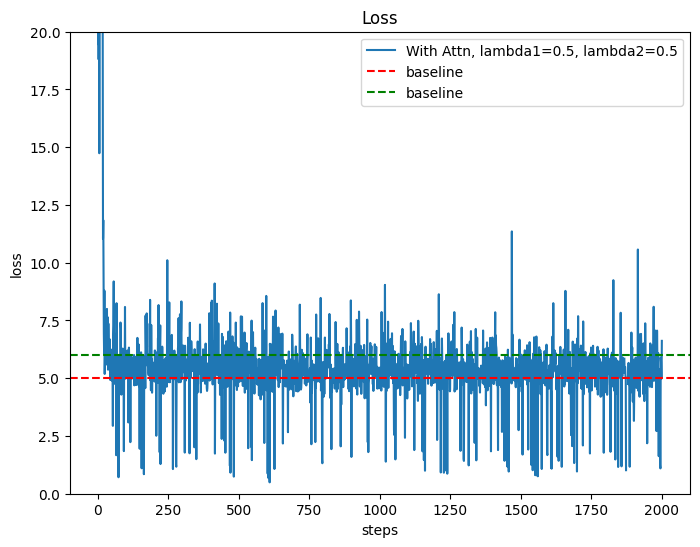

In [3]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(8, 6))

xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=5.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=6.0, color='g', linestyle='--', label=f"baseline")

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=20.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

Min Train Loss: 0.3053


Text(0.5, 1.0, 'Loss')

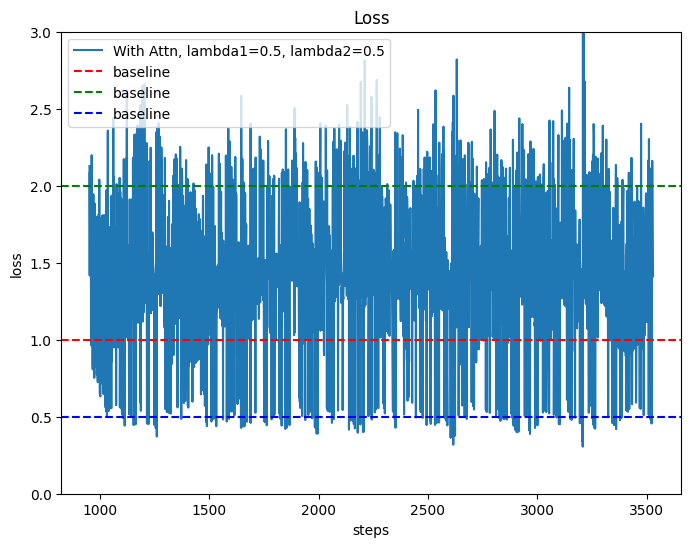

In [103]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load the log file
with open("log2/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items())[800:])
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(8, 6))

xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

Min Train Loss: 0.3633


0.039999056240433324

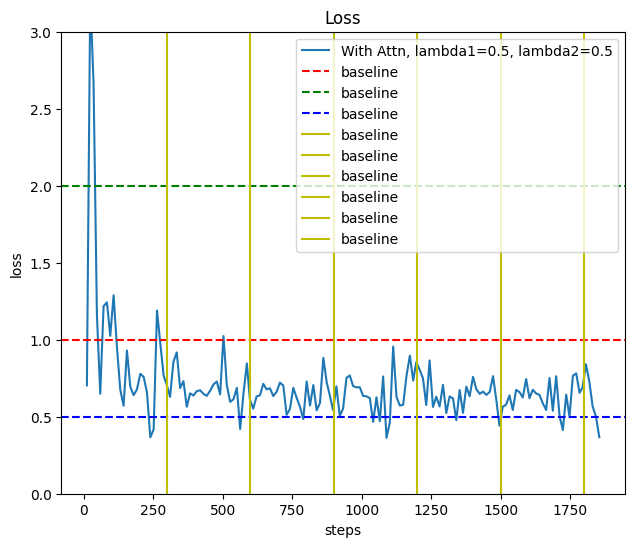

In [81]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_13-08-05_lr_0.04_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(8, 8, 4)_patch2d_(64, 64)_embed_2048_head_8_width2d_2048_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items())[0:155])
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")
for i in range(6):
    plt.axvline(x=300*(i+1), color='y', linestyle='-', label=f"baseline")
plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)


Min Train Loss: 0.3801


0.03999982737441349

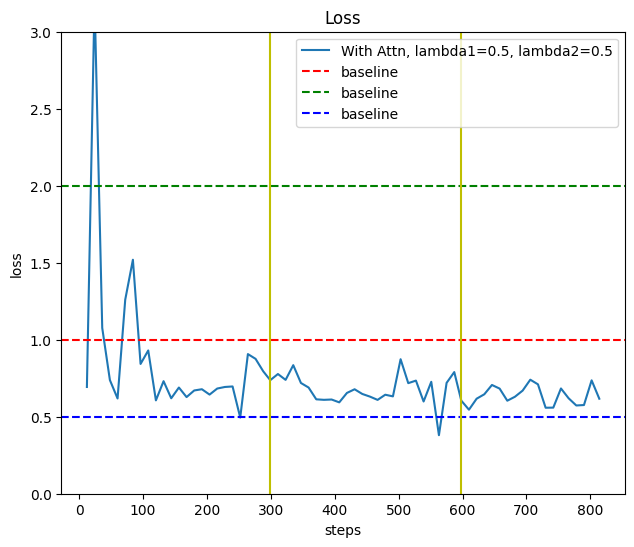

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_16-27-56_lr_0.04_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items())[0:155])
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)



Min Train Loss: 0.2875


0.039982678872503695

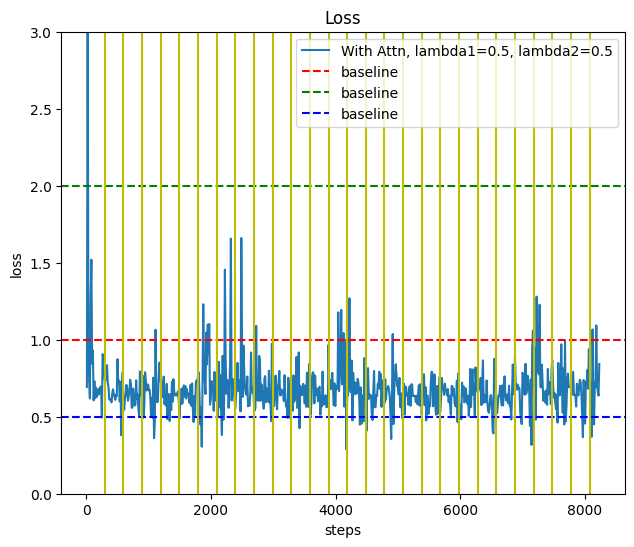

In [37]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_17-11-22_lr_0.04_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)



Min Train Loss: 0.2056


0.09981842860919755

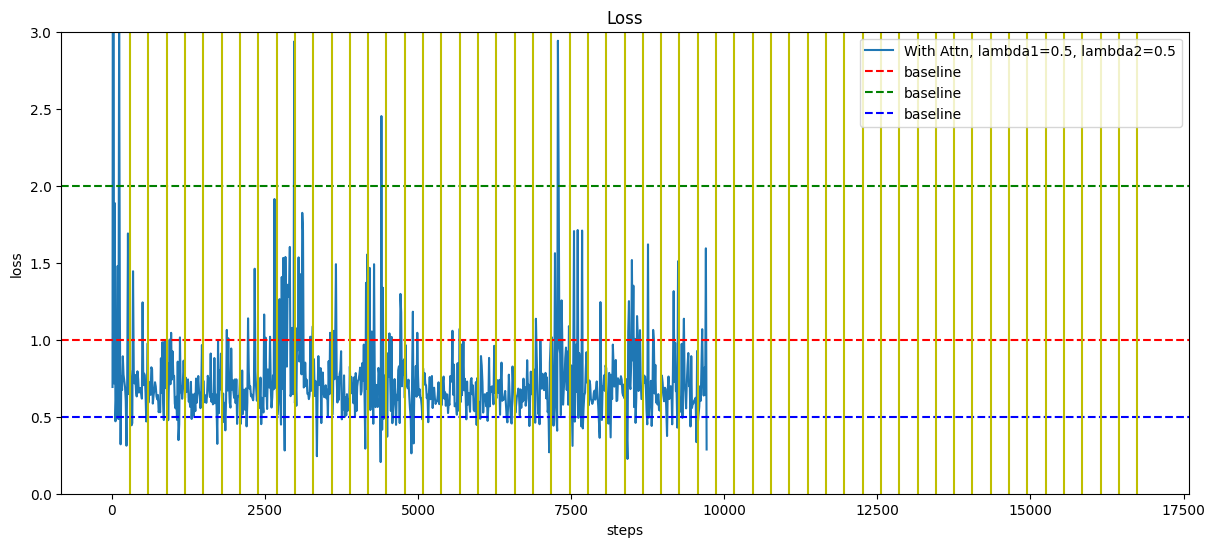

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_17-42-11_lr_0.1_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(32, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)



Min Train Loss: 0.3353


0.009982484679277759

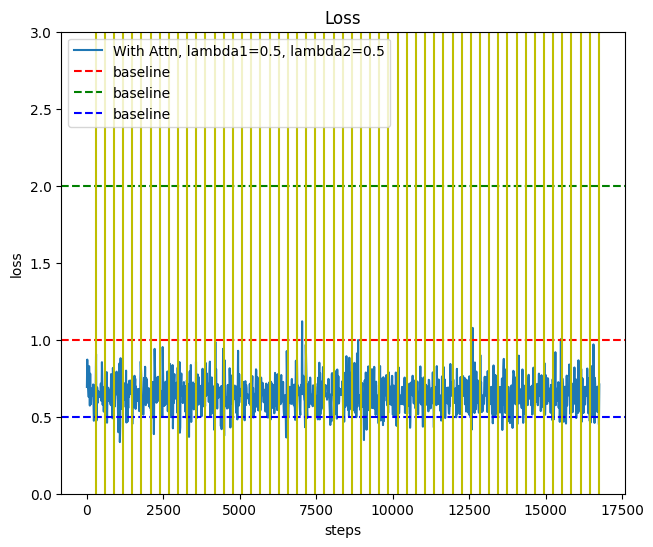

In [1]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-30_17-47-19_lr_0.01_batch_1_epochs_100_lambda1_0.0_lambda2_1.0_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"] 
np.mean(ys)

Min Train Loss: 2.4654


0.003999997564504582

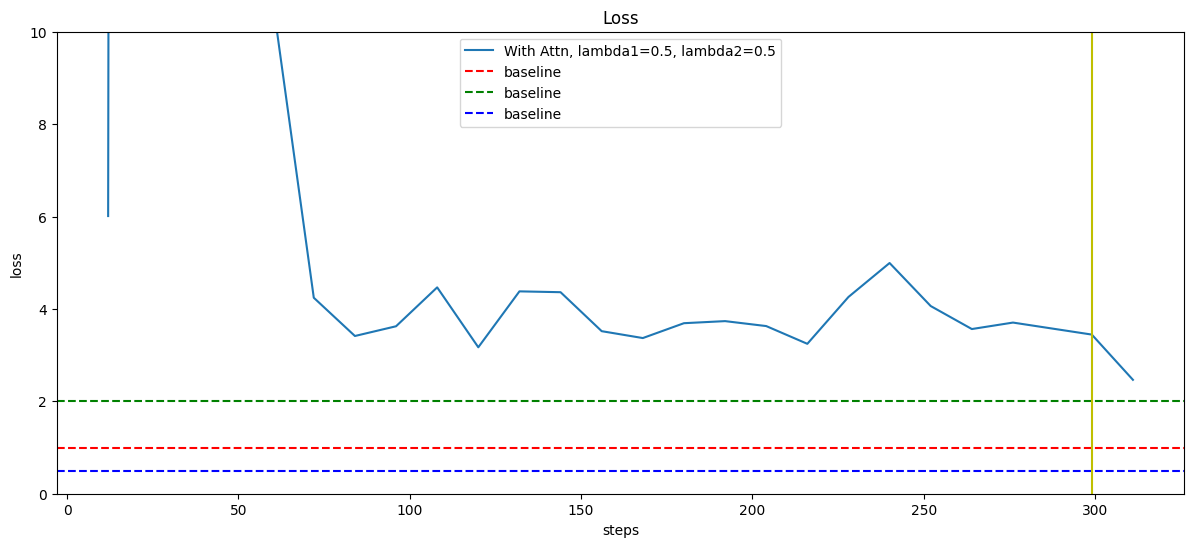

In [24]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-07-31_11-40-15_lr_0.004_batch_1_epochs_100_lambda1_0.5_lambda2_0.5_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(32, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'With Attn, lambda1=0.5, lambda2=0.5')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

for i in range(len(ys)//(299//12 + 1)):
    plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=10.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

xs, ys = streams2_xy["lr"]
np.mean(ys)



Min Train Loss: 0.033


Text(0.5, 1.0, 'Loss')

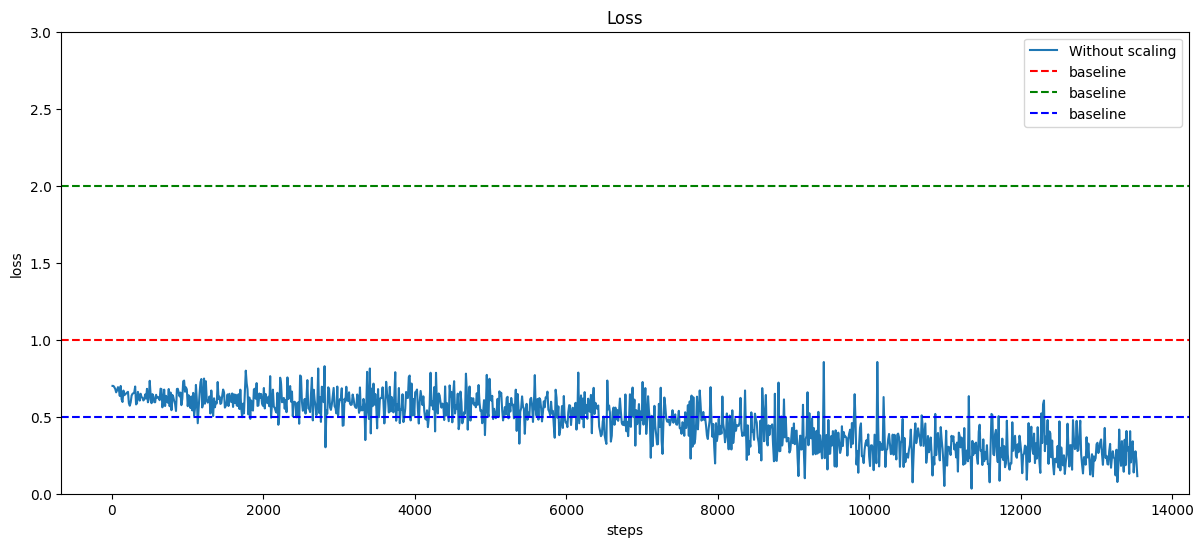

In [12]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-08-02_15-04-46_lr_1e-06_batch_1_epochs_100_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
        streams2[stream2] = {}
    streams[stream][int(step)] = float(val)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(32, 6))

plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'Without scaling')
print("Min Train Loss:", min(ys))

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

# for i in range(len(ys)//(299//12 + 1)):
#     plt.axvline(x=299*(i+1), color='y', linestyle='-')

plt.xlabel("steps")
plt.ylabel("loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")



Min Train Loss: 0.007
Min Train Loss: 12.0


array([1.20000e+01, 2.40000e+01, 3.60000e+01, ..., 1.67716e+05,
       1.67728e+05, 1.67739e+05])

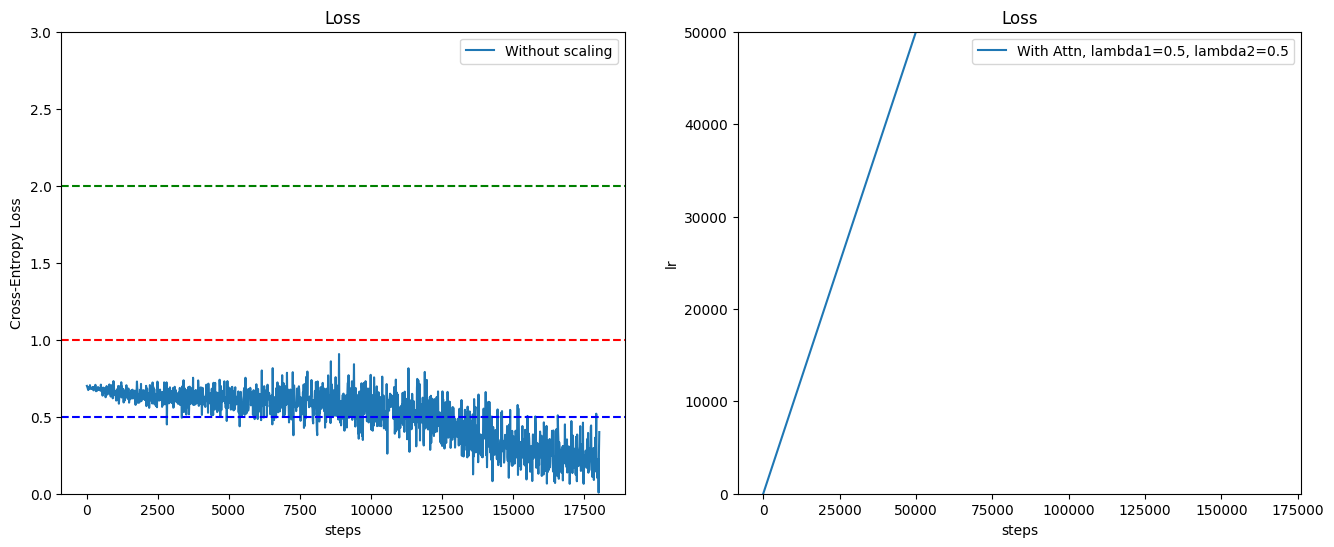

In [17]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-08-02_16-08-57_lr_3e-06_batch_1_epochs_1000_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
streams3 = {}
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'Without scaling')
print("Min Train Loss:", min(ys))

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(1, 2, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)

plt.xlabel("steps")
plt.ylabel("lr")
plt.ylim(top=50000, bottom = 0.0)
plt.legend()
plt.title("Loss")

240805 track learning rate

Min Train Loss: 0.5083


Text(0.5, 1.0, 'Loss')

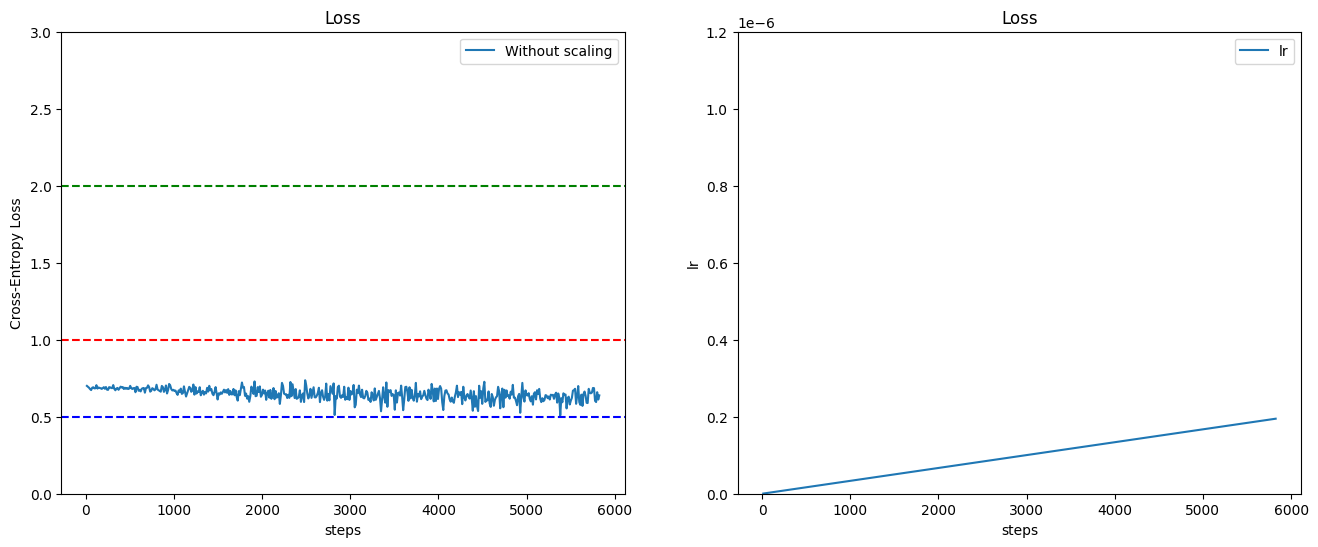

In [1]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

# load the log file
with open("./log/log_time_2024-08-05_14-08-18_lr_1e-06_batch_1_epochs_1000_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {}
streams2 = {}
streams3 = {}
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'Without scaling')
print("Min Train Loss:", min(ys))

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=3.0, bottom = 0.0)
plt.legend()
plt.title("Loss")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(1, 2, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)

plt.plot(xs, ys, label=f"lr")

plt.xlabel("steps")
plt.ylabel("lr")
plt.ylim(top=0.0000012, bottom = 0.0)
plt.legend()
plt.title("Loss")

Text(0.5, 1.0, 'lr')

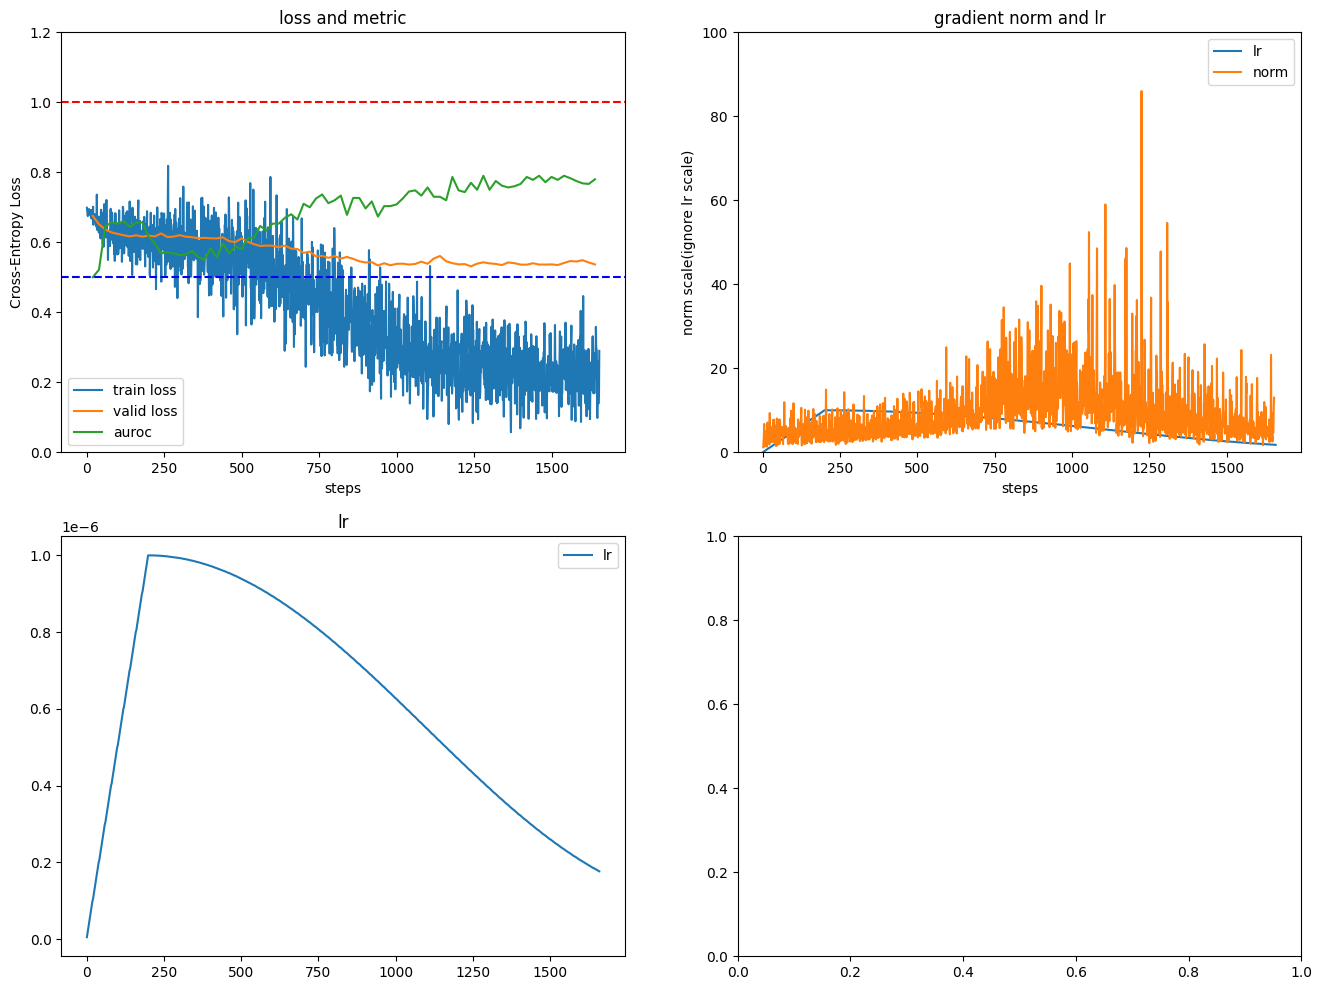

In [31]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "log_time_2024-08-05_17-06-02_lr_1e-06_batch_1_epochs_100_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

Text(0.5, 1.0, 'gradient norm')

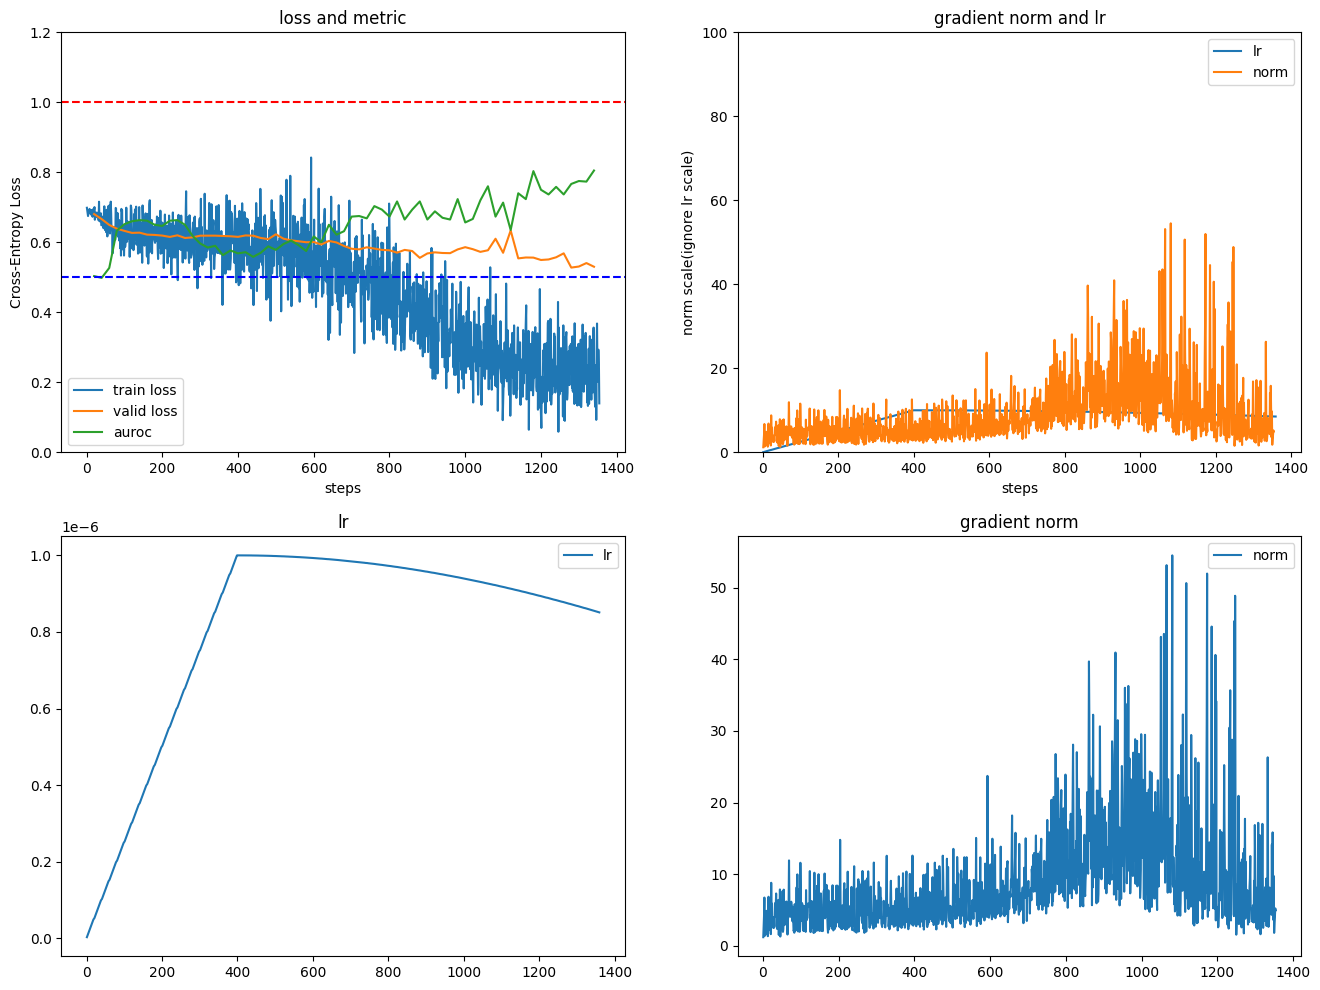

In [55]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-05_23-41-52_lr_1e-06_gpu_7_layer_6_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

Text(0.5, 1.0, 'gradient norm')

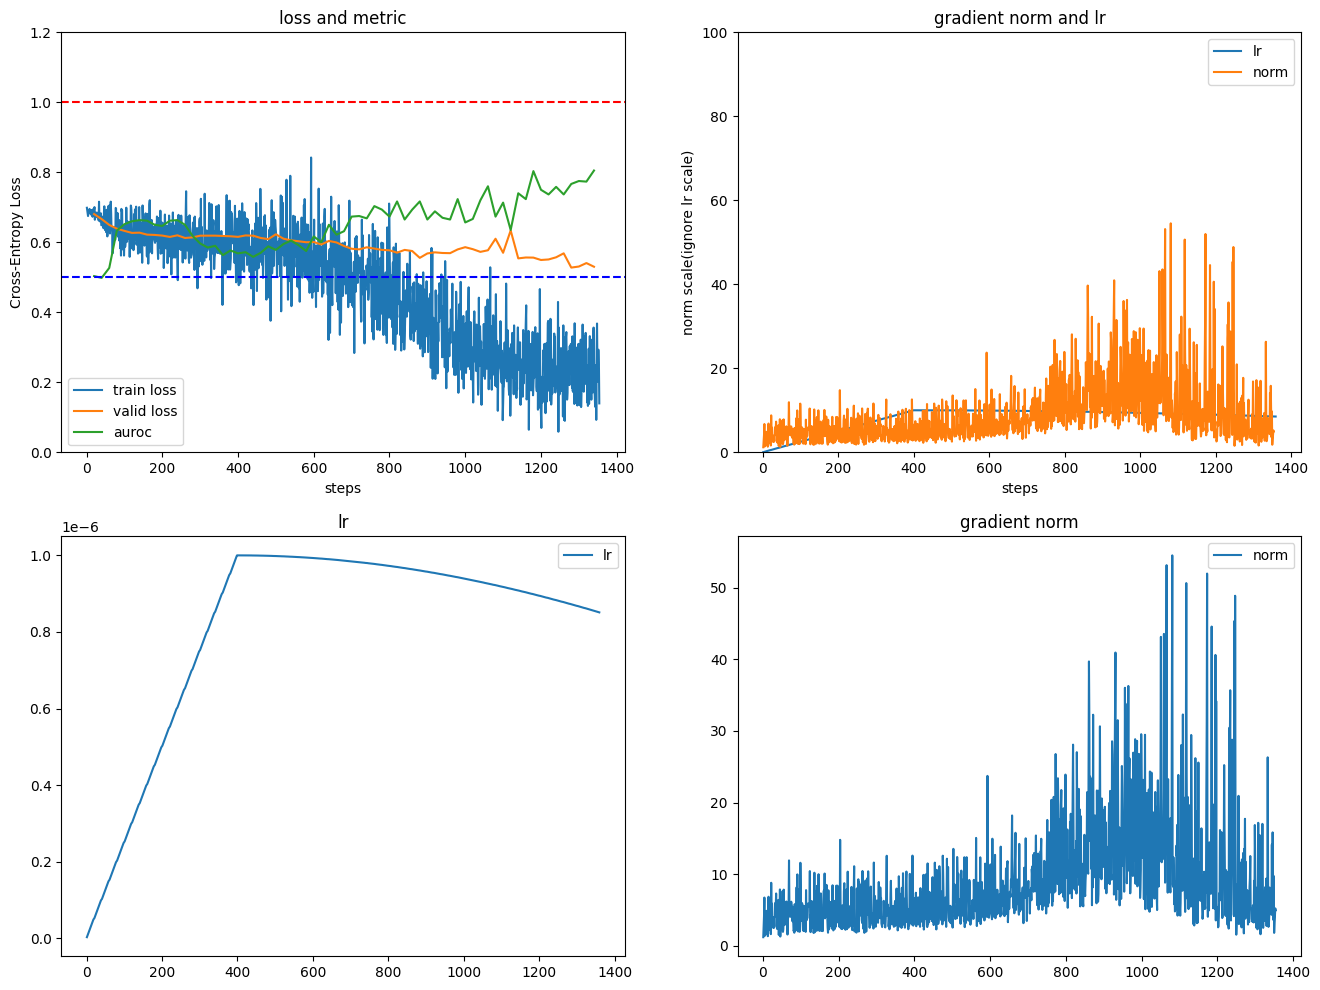

In [14]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-06_10-14-38_lr_1e-06_gpu_6_layer_6_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_16_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

Text(0.5, 1.0, 'gradient norm')

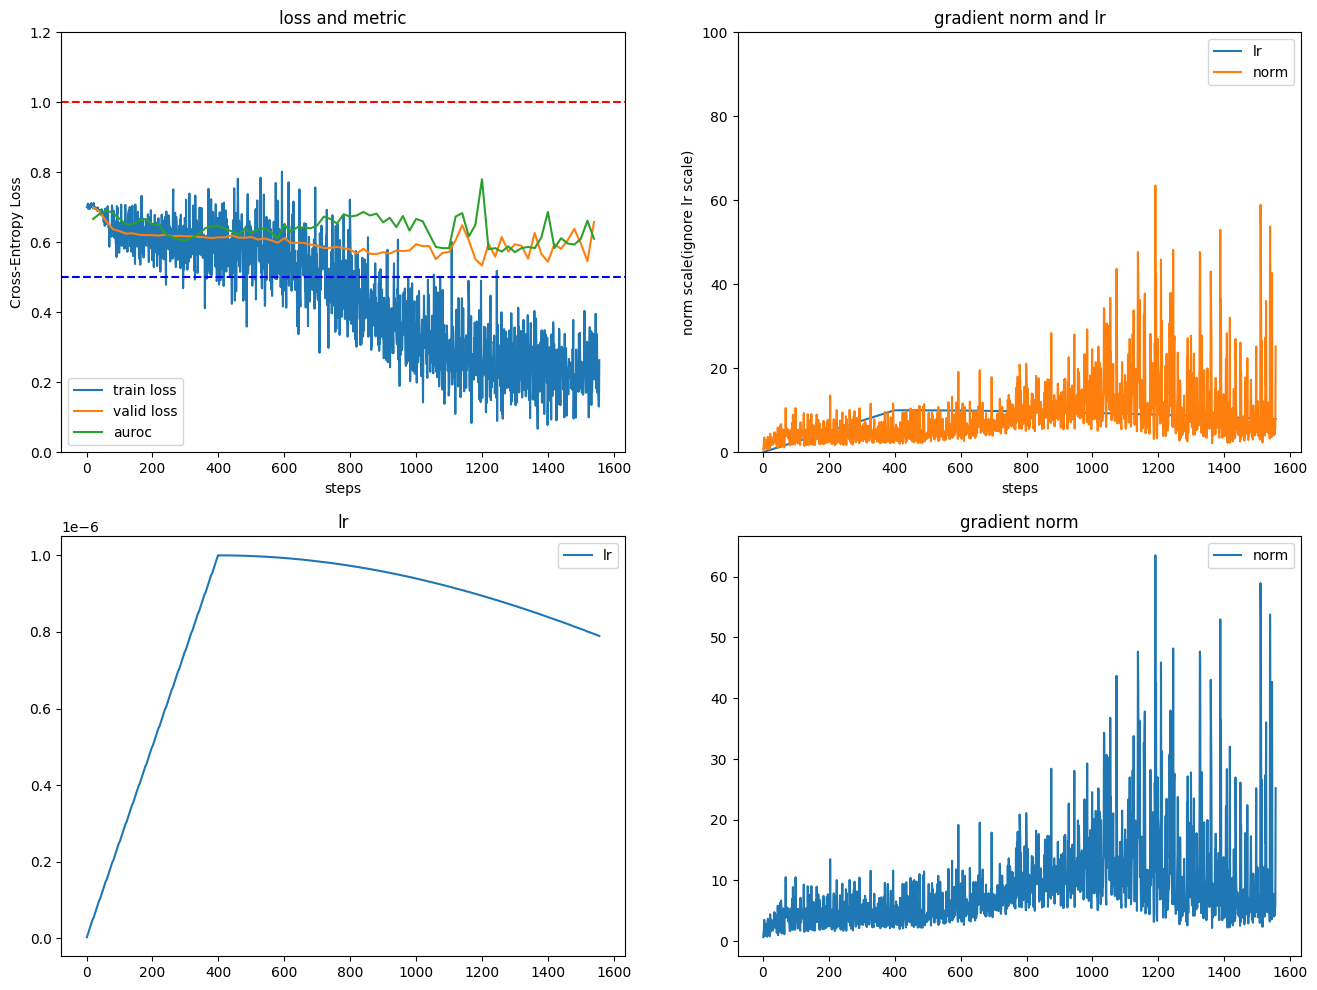

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-06_13-50-01_lr_1e-06_gpu_5_layer_4_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

Text(0.5, 1.0, 'gradient norm')

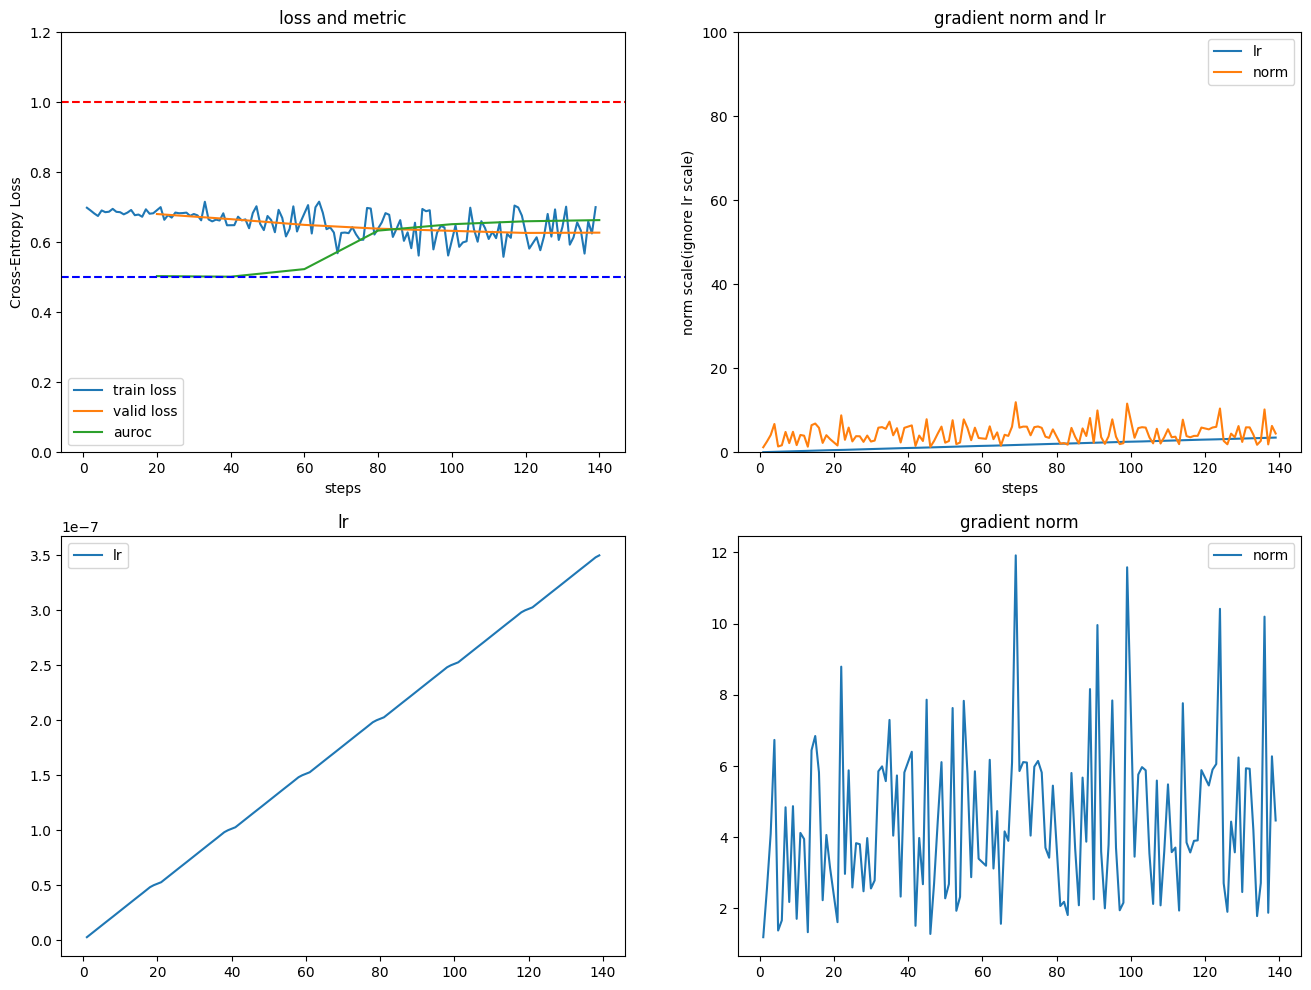

In [3]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-07_12-32-58_lr_1e-06_gpu_7_layer_6_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

Max auroc: 0.8566666666666666


Text(0.5, 1.0, 'gradient norm')

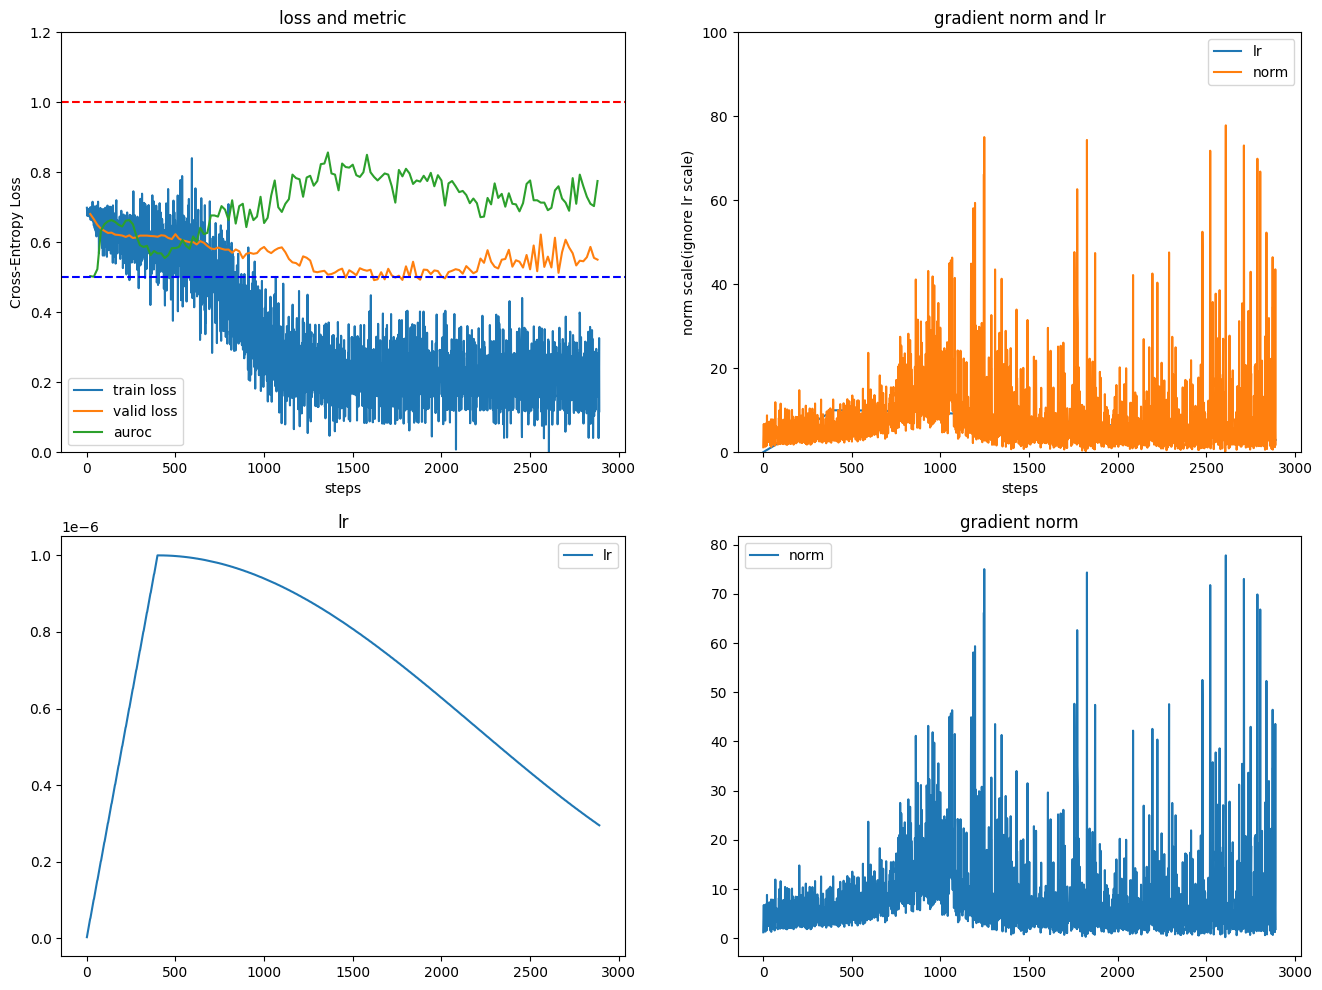

In [2]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-07_12-32-58_lr_1e-06_gpu_7_layer_6_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

print("Max auroc:", max(ys))

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=1.0, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

Max auroc: 0.8566666666666666


Text(0.5, 1.0, 'gradient norm')

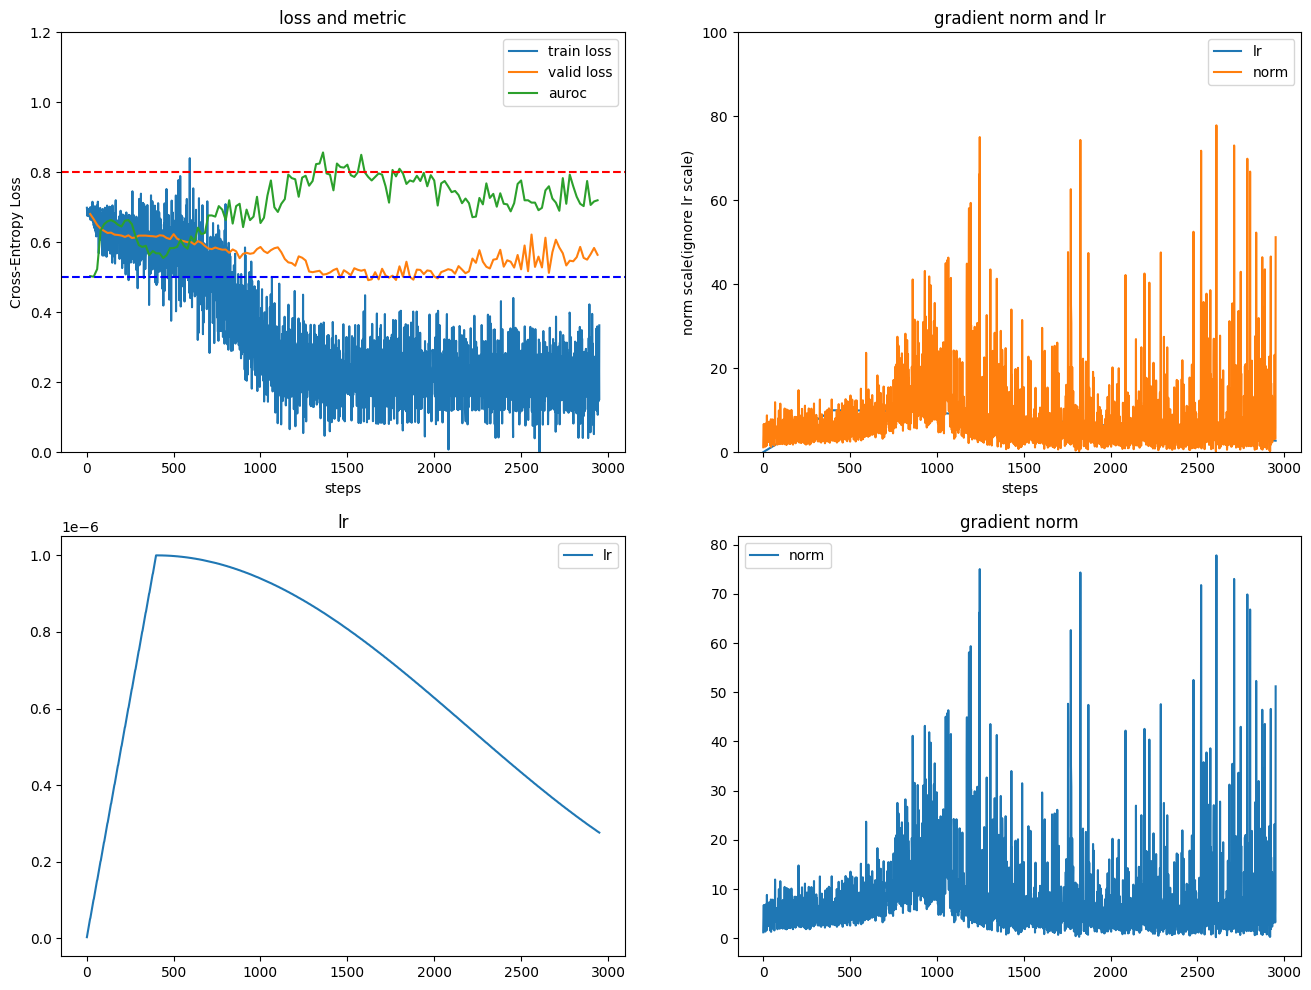

In [5]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir("/mnt/aix22301/onj")

file = "2024-08-07_12-32-58_lr_1e-06_gpu_7_layer_6_batch_16_epochs_200_patch3d_(16, 16, 8)_patch2d_(64, 64)_embed_1024_head_8_width2d_1024_width3d_512"

# load the log file
with open(f"./log/{file}/log.txt", "r") as f:
    lines = f.readlines()
    

# parse the individual lines, group by stream (train,val,hella)
streams = {} # train epoch
streams2 = {} # norm valid
streams3 = {} # lr auroc
for line in lines:
    step, stream, val, stream2, val2, stream3, val3 = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    if stream2 not in streams2:
        streams2[stream2] = {}
    if stream3 not in streams3:
        streams3[stream3] = {}

    streams[stream][int(step)] = float(val)
    streams2[stream2][int(step)] = float(val2)
    streams3[stream3][int(step)] = float(val3)
    # streams2[stream2][int(step)] = float(val2[1: -1])

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))


streams2_xy = {}
for k, v in streams2.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams2_xy[k] = list(zip(*xy))
    
streams3_xy = {}
for k, v in streams3.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams3_xy[k] = list(zip(*xy))

# create figure
# plt.figure(figsize=(16, 6))
num_x, num_y = (2, 2)
fig, axes = plt.subplots(num_x, num_y, figsize=(16, 12))
plt.subplot(num_x, num_y, 1)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'train loss')
# print("Min Train Loss:", min(ys))

xs, ys = streams2_xy["valid"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"valid loss")

xs, ys = streams3_xy["auroc"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"auroc")

print("Max auroc:", max(ys))

plt.xlabel("steps")
plt.ylabel("Cross-Entropy Loss")
plt.ylim(top=1.2, bottom = 0.0)
plt.legend()
plt.title("loss and metric")

plt.axhline(y=0.8, color='r', linestyle='--', label=f"baseline")
plt.axhline(y=2.0, color='g', linestyle='--', label=f"baseline")
plt.axhline(y=0.5, color='b', linestyle='--', label=f"baseline")

plt.subplot(num_x, num_y, 2)
xs, ys = streams3_xy["lr"] # training loss
ys = np.array(ys)*10000000

plt.plot(xs, ys, label=f"lr")
plt.xlabel("steps")
plt.ylabel("norm scale(ignore lr scale)")
plt.ylim(top=100, bottom = 0.0)

plt.subplot(num_x, num_y, 2)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm and lr")

plt.subplot(num_x, num_y, 3)
xs, ys = streams3_xy["lr"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"lr")
plt.legend()
plt.title("lr")

plt.subplot(num_x, num_y, 4)
xs, ys = streams2_xy["norm"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"norm")
plt.legend()
plt.title("gradient norm")

In [ ]:
# TODO: batch gradient descent
# TODO: accuracy plot
# TODO: validation set
# TODO: check dataset change MDCT order in depth